In [1]:
import numpy as np

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import acquire
import prepare
from sklearn.ensemble import RandomForestClassifier

In [2]:
titanic = prepare.prep_titanic()

In [3]:
titanic['baseline'] = 0

In [4]:
train, test, val = prepare.split_data(titanic, 'survived')

In [250]:
# Split so that X_cols holds only the data (clues) and y_cols holds the answers
X_cols = train.columns.to_list()
y_cols = 'survived'

In [6]:
# drop y_cols from X_cols
X_cols.remove('survived')

In [7]:
X_val, y_val = val[X_cols], val[y_cols]

In [8]:
train

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,baseline
474,0,3,22.000000,0,0,9.8375,1,0,0,1,0
370,1,1,25.000000,1,0,55.4417,0,1,0,0,0
573,1,3,29.699118,0,0,7.7500,1,0,1,0,0
110,0,1,47.000000,0,0,52.0000,1,1,0,1,0
167,0,3,45.000000,1,4,27.9000,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
735,0,3,28.500000,0,0,16.1000,1,1,0,1,0
163,0,3,17.000000,0,0,8.6625,1,1,0,1,0
770,0,3,24.000000,0,0,9.5000,1,1,0,1,0
196,0,3,29.699118,0,0,7.7500,1,1,1,0,0


In [9]:
X_train = train[X_cols]
y_train = train[y_cols]

1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [11]:
# make the thing
rf = RandomForestClassifier(min_samples_leaf=1, 
                           max_depth=10,
                           random_state=1349)
# fit the thing
# remember, we only fit using the train dataset!!!
rf.fit(X_train, y_train)

# Use the thing
rf_0_preds = rf.predict(X_train)
rf.score(X_train, y_train)

0.9598393574297188

In [12]:
rf.score(X_val, y_val)

0.7990654205607477

2. Evaluate your results using the model score, confusion matrix, and classification report.

In [13]:
rubric = pd.DataFrame(
{'pred_0': ['True Positive', 'False Negative'],
'pred_1': ['False Positive', 'True Negative']
}, index=['actual_0', 'actual_1'])

In [14]:
conf_rf = confusion_matrix(y_train, rf_0_preds)

In [15]:
rubric + ': ' + conf_rf.astype(str)

,pred_0,pred_1
actual_0,True Positive: 304,False Positive: 3
actual_1,False Negative: 17,True Negative: 174


In [16]:
pd.DataFrame(
classification_report(
    y_train, 
    rf_0_preds,
    output_dict=True
))

,0,1,accuracy,macro avg,weighted avg
precision,0.947040,0.983051,0.959839,0.965046,0.960852
recall,0.990228,0.910995,0.959839,0.950611,0.959839
f1-score,0.968153,0.945652,0.959839,0.956903,0.959523
support,307.000000,191.000000,0.959839,498.000000,498.000000


3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [18]:
TP, FP, FN, TN = conf_rf.ravel()

In [19]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
TPR = recall = TP / (TP + FN)
FPR = FP / (FP + TN)
TNR = TN / (FP + TN)
FNR = FN / (FN + TP)
precision =  TP / (TP + FP)
f1 =  2 * ((precision * recall) / ( precision + recall))
support_0 = train[train.survived == 0].shape[0]
support_1 = train[train.survived == 1].shape[0]

In [20]:
accuracy, TPR, FPR, TNR, FNR, precision, recall, f1, support_0, support_1

(0.9598393574297188,
 0.9470404984423676,
 0.01694915254237288,
 0.9830508474576272,
 0.0529595015576324,
 0.990228013029316,
 0.9470404984423676,
 0.9681528662420381,
 307,
 191)

4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [ ]:
# Lets make a for loop like we did in decision trees

In [247]:
rf_models = {}

for i in [pair for pair in zip (range(1, 10), range(10, 1, -1))]:
    # make the things
    clf = RandomForestClassifier(min_samples_leaf=i[0],
                                max_depth=i[1])
    # fit the things
    clf.fit(X_train, y_train)
    #Before we can use the things, we have to name and store the things 
    #to be able to call them
    rf_models[f'{clf}{i}_model'] = {
        'model': clf,
        'train_score': round(clf.score(X_train, y_train), 2),
        'validate_score': round(clf.score(X_val, y_val), 2),
        'val_diff': round(clf.score(X_train, y_train), 2) - round(clf.score(X_val, y_val))
    
    }


In [248]:
pd.DataFrame(rf_models).T

,model,train_score,validate_score,val_diff
"RandomForestClassifier(max_depth=10)(1, 10)_model","(DecisionTreeClassifier(max_depth=10, max_features='sqrt',\n ran...",0.96,0.78,-0.04
"RandomForestClassifier(max_depth=9, min_samples_leaf=2)(2, 9)_model","(DecisionTreeClassifier(max_depth=9, max_features='sqrt', min_samples_leaf=2,\n ...",0.91,0.79,-0.09
"RandomForestClassifier(max_depth=8, min_samples_leaf=3)(3, 8)_model","(DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=3,\n ...",0.89,0.79,-0.11
"RandomForestClassifier(max_depth=7, min_samples_leaf=4)(4, 7)_model","(DecisionTreeClassifier(max_depth=7, max_features='sqrt', min_samples_leaf=4,\n ...",0.88,0.79,-0.12
"RandomForestClassifier(max_depth=6, min_samples_leaf=5)(5, 6)_model","(DecisionTreeClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=5,\n ...",0.87,0.79,-0.13
"RandomForestClassifier(max_depth=5, min_samples_leaf=6)(6, 5)_model","(DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=6,\n ...",0.86,0.78,-0.14
"RandomForestClassifier(max_depth=4, min_samples_leaf=7)(7, 4)_model","(DecisionTreeClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=7,\n ...",0.86,0.78,-0.14
"RandomForestClassifier(max_depth=3, min_samples_leaf=8)(8, 3)_model","(DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=8,\n ...",0.84,0.76,-0.16
"RandomForestClassifier(max_depth=2, min_samples_leaf=9)(9, 2)_model","(DecisionTreeClassifier(max_depth=2, max_features='sqrt', min_samples_leaf=9,\n ...",0.81,0.76,-0.19


In [201]:
# so lets make a loop to find the best model == best validate_score

max_score = 0
best_model = ''

for model in rf_models:
    if rf_models[model]['validate_score'] > max_score:
        max_score = rf_models[model]['validate_score']
        best_model = model
print(f'The model with the best validate score is {best_model} with a score of {max_score}.')


The model with the best validate score is RandomForestClassifier(max_depth=9, min_samples_leaf=2)(2, 9)_model with a score of 0.8.


In [202]:
pred_df = pd.DataFrame(
{
    'baseline': [0 for i in range(
    0, val.shape[0])],
    'y_true': y_val.values
    
}
)
pred_df

,baseline,y_true
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
209,0,0
210,0,1
211,0,1
212,0,0


5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?


In [211]:
for model in rf_models:
    model_preds = rf_models[model]['model'].predict(X_val)
    pred_df[model] = model_preds

In [209]:
rf_models['RandomForestClassifier(max_depth=10)(1, 10)_model']['model']

{RandomForestClassifier(max_depth=10)}

In [143]:
# SO now we make a prediction dataframe to feed into somethting that will calculate
# how our models did on the validate dataset

In [233]:
pred_df

,baseline,y_true,"RandomForestClassifier(max_depth=10)(1, 10)_model","RandomForestClassifier(max_depth=9, min_samples_leaf=2)(2, 9)_model","RandomForestClassifier(max_depth=8, min_samples_leaf=3)(3, 8)_model","RandomForestClassifier(max_depth=7, min_samples_leaf=4)(4, 7)_model","RandomForestClassifier(max_depth=6, min_samples_leaf=5)(5, 6)_model","RandomForestClassifier(max_depth=5, min_samples_leaf=6)(6, 5)_model","RandomForestClassifier(max_depth=4, min_samples_leaf=7)(7, 4)_model","RandomForestClassifier(max_depth=3, min_samples_leaf=8)(8, 3)_model","RandomForestClassifier(max_depth=2, min_samples_leaf=9)(9, 2)_model"
0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,1,1,1,1,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
209,0,0,0,0,0,0,0,0,0,0,0
210,0,1,1,1,1,1,1,1,1,1,1
211,0,1,1,1,1,1,1,1,1,1,1
212,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# making a function that calculates the evaluation metrics of a model
# Desired outputs:
    # confusion mmatrix
    # classification report
    # score
    # accuracy = (TP + TN) / (TP + TN + FP + FN)
    # TPR = recall = TP / (TP + FN)
    # FPR = FP / (FP + TN)
    # TNR = TN / (FP + TN)
    # FNR = FN / (FN + TP)
    # precision =  TP / (TP + FP)
    # f1 =  2 * ((precision * recall) / ( precision + recall))
    # support_0 = train[train.survived == 0].shape[0]
    # support_1 = train[train.survived == 1].shape[0]
    
# what does the fucntion need?
    # a cleaned and split set of train, validate, and test
    # 6 variables holding train, validate, and test X_cols and y_cols
    # a model that is trained on the X_train and y_train datasets
    # a y_preds dataset from either the X_train, X_validate, or X_test 
    
def evaluation_metrics():
    

In [153]:
rf_models = pd.DataFrame(rf_models)
rf_models

,"RandomForestClassifier(max_depth=10)(1, 10)_model","RandomForestClassifier(max_depth=9, min_samples_leaf=2)(2, 9)_model","RandomForestClassifier(max_depth=8, min_samples_leaf=3)(3, 8)_model","RandomForestClassifier(max_depth=7, min_samples_leaf=4)(4, 7)_model","RandomForestClassifier(max_depth=6, min_samples_leaf=5)(5, 6)_model","RandomForestClassifier(max_depth=5, min_samples_leaf=6)(6, 5)_model","RandomForestClassifier(max_depth=4, min_samples_leaf=7)(7, 4)_model","RandomForestClassifier(max_depth=3, min_samples_leaf=8)(8, 3)_model","RandomForestClassifier(max_depth=2, min_samples_leaf=9)(9, 2)_model"
model,"{(DecisionTreeClassifier(max_depth=10, max_features='sqrt',\n ra...","{(DecisionTreeClassifier(max_depth=9, max_features='sqrt', min_samples_leaf=2,\n ...","{(DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=3,\n ...","{(DecisionTreeClassifier(max_depth=7, max_features='sqrt', min_samples_leaf=4,\n ...","{(DecisionTreeClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=5,\n ...","{(DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=6,\n ...","{(DecisionTreeClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=7,\n ...","{(DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=8,\n ...","{(DecisionTreeClassifier(max_depth=2, max_features='sqrt', min_samples_leaf=9,\n ..."
train_score,0.96,0.91,0.9,0.88,0.87,0.86,0.85,0.84,0.8
validate_score,0.79,0.8,0.79,0.8,0.79,0.79,0.78,0.77,0.75
val_diff,-0.04,-0.09,-0.1,-0.12,-0.13,-0.14,-0.15,-0.16,-0.2


In [213]:
accuracy_df = pd.DataFrame(
{
    'model': [model for model in rf_models],
    'train_accuracy': [rf_models[model]['train_score'] for model in rf_models],
    'validate_accuracy': [rf_models[model]['validate_score'] for model in rf_models],
    'diff': [rf_models[model]['val_diff'] for model in rf_models]
}
)
accuracy_df

,model,train_accuracy,validate_accuracy,diff
0,"RandomForestClassifier(max_depth=10)(1, 10)_model",0.96,0.79,-0.04
1,"RandomForestClassifier(max_depth=9, min_samples_leaf=2)(2, 9)_model",0.91,0.81,-0.09
2,"RandomForestClassifier(max_depth=8, min_samples_leaf=3)(3, 8)_model",0.89,0.79,-0.11
3,"RandomForestClassifier(max_depth=7, min_samples_leaf=4)(4, 7)_model",0.88,0.80,-0.12
4,"RandomForestClassifier(max_depth=6, min_samples_leaf=5)(5, 6)_model",0.87,0.78,-0.13
5,"RandomForestClassifier(max_depth=5, min_samples_leaf=6)(6, 5)_model",0.86,0.77,-0.14
6,"RandomForestClassifier(max_depth=4, min_samples_leaf=7)(7, 4)_model",0.85,0.78,-0.15
7,"RandomForestClassifier(max_depth=3, min_samples_leaf=8)(8, 3)_model",0.85,0.78,-0.15
8,"RandomForestClassifier(max_depth=2, min_samples_leaf=9)(9, 2)_model",0.82,0.77,-0.18


<AxesSubplot:title={'center':'performance over depth of RF'}>

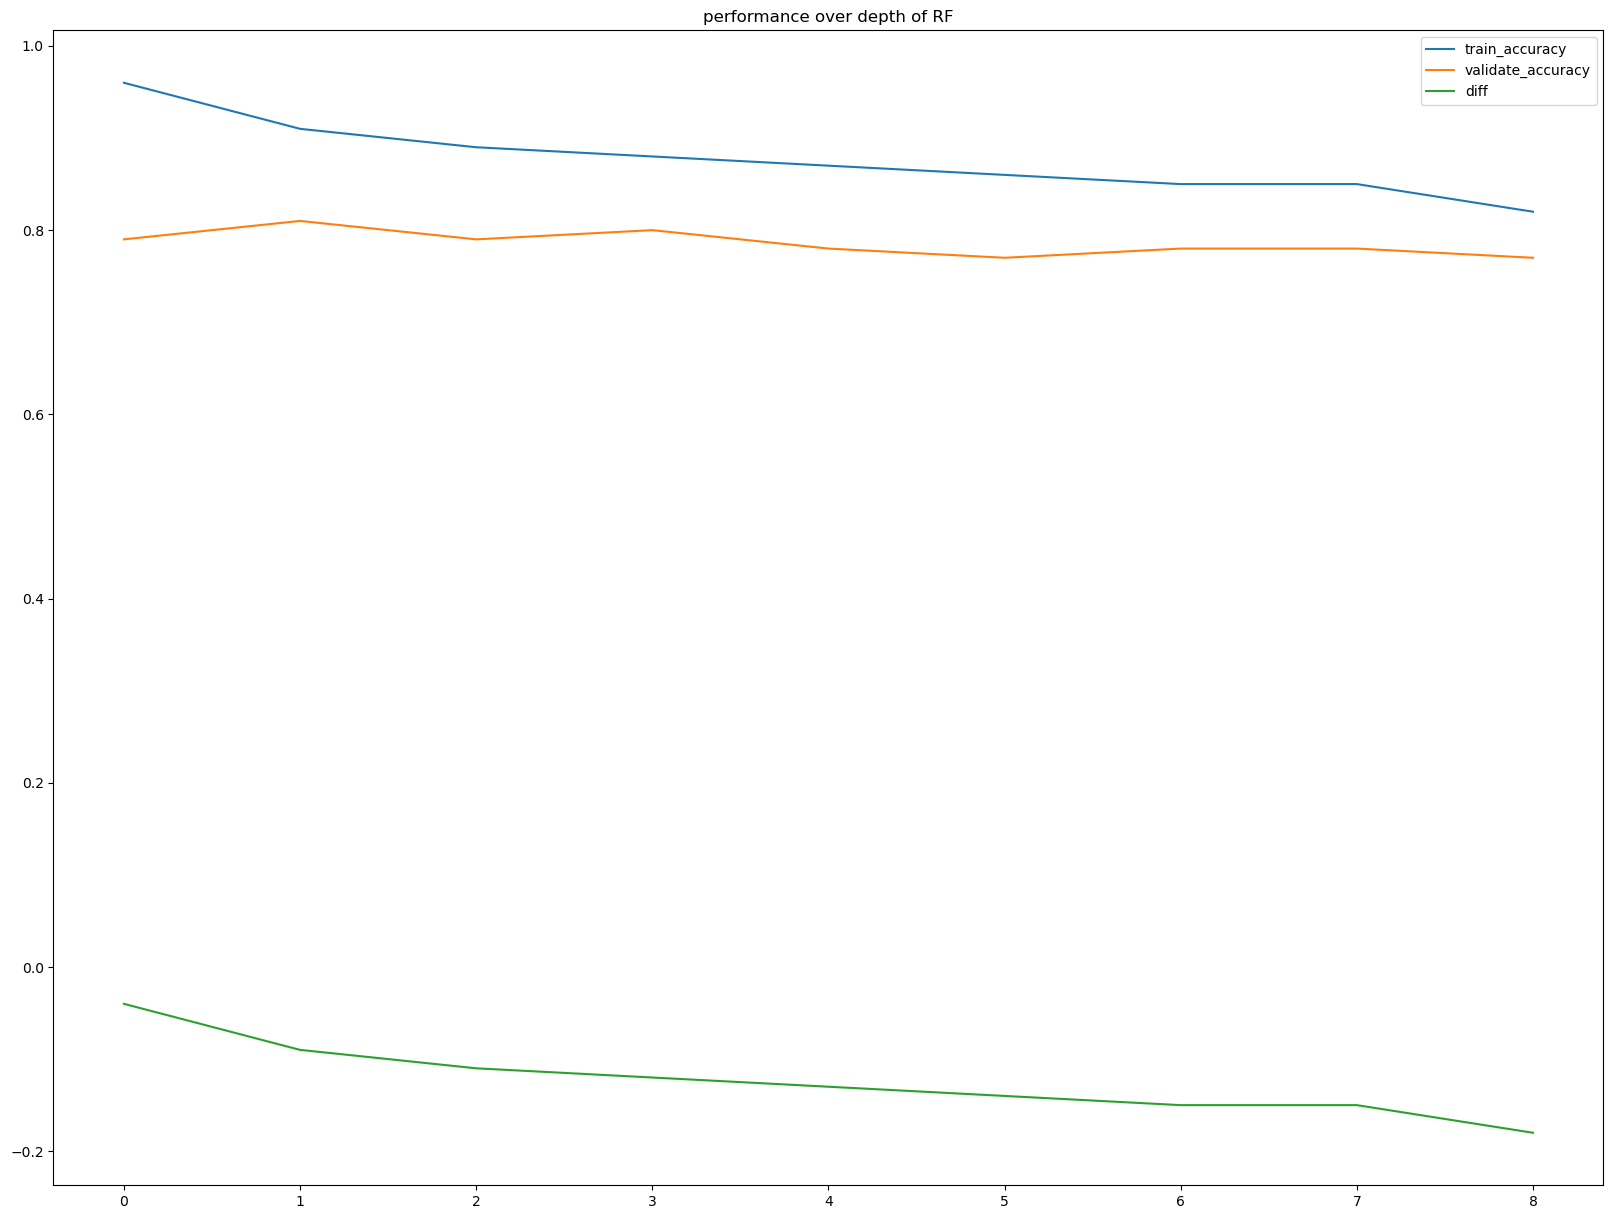

In [215]:
accuracy_df.plot(title='performance over depth of RF', figsize=(20,15))

In [240]:
best_model = accuracy_df[1:2]['model'].astype(str)
print(f'Looks like {best_model} is the best model.')

Looks like 1    RandomForestClassifier(max_depth=9, min_samples_leaf=2)(2, 9)_model
Name: model, dtype: object is the best model.


In [ ]:
X_test, y_test = test[X_cols], test[y_cols]

In [270]:
X_test = X_test.drop(columns=('survived'))

In [271]:
test_preds = rf_models['RandomForestClassifier(max_depth=9, min_samples_leaf=2)(2, 9)_model']['model'].predict(
    X_test)
test_score = rf_models['RandomForestClassifier(max_depth=9, min_samples_leaf=2)(2, 9)_model']['model'].score(
    X_test, y_test)

In [272]:
test_score

0.8156424581005587